## Part 1

Import libraries and load the dataset

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os
import warnings
from pandas import Series

In [107]:
df= pd.read_json('ultimate_data_challenge.json')

In [108]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [109]:
df1= pd.read_json('logins.json')

In [110]:
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Aggregate login counts based on 15-minute time intervals

In [111]:
login_counts = df1.resample('15min', on = 'login_time').count()
login_counts.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [112]:
login_counts.rename({'login_time':'logins'}, axis =1, inplace=True)
login_counts.reset_index(inplace=True)
login_counts.head()

,login_time,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


Adding a day, hour and day or night into dataset. 

In [113]:
login_counts['hour']= login_counts['login_time'].dt.hour
login_counts['day'] = login_counts['login_time'].dt.day_name()
am_pm = lambda row: 'AM' if row in range(0,12) else 'PM'
login_counts['AM-PM'] = login_counts['hour'].apply(am_pm)

login_counts.head()

,login_time,logins,hour,day,AM-PM
0,1970-01-01 20:00:00,2,20,Thursday,PM
1,1970-01-01 20:15:00,6,20,Thursday,PM
2,1970-01-01 20:30:00,9,20,Thursday,PM
3,1970-01-01 20:45:00,7,20,Thursday,PM
4,1970-01-01 21:00:00,1,21,Thursday,PM


In [114]:
login_day = login_counts.groupby('day').agg({'logins':'sum'})

In [115]:
login_day = login_day.reset_index()

Text(0.5, 1.0, 'Logins by Day of Week')

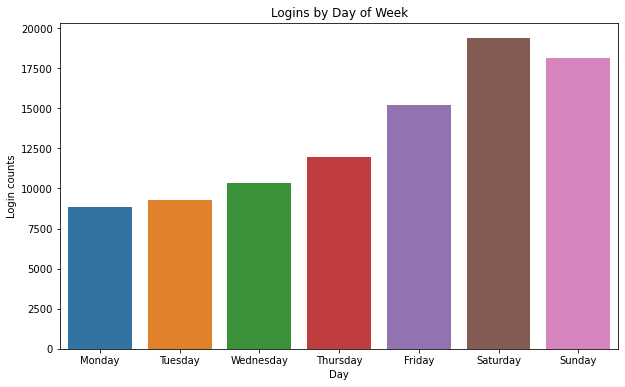

In [116]:
fig = plt.figure(figsize=(10,6)) 
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = 'day', y = 'logins', data = login_day, order=weekday_order)
plt.xlabel('Day')
plt.ylabel('Login counts')
plt.title('Logins by Day of Week')

In [117]:
login_hour = login_counts.groupby('hour').agg({'logins':'sum'})
login_hour =login_hour.reset_index()

Text(0.5, 1.0, 'Logins by Hour')

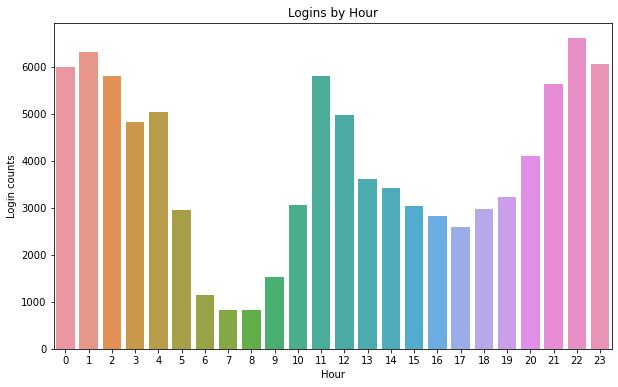

In [118]:
fig = plt.figure(figsize=(10,6))
# bar plot
sns.barplot(x = 'hour', y = 'logins', data = login_hour)
plt.xlabel('Hour')
plt.ylabel('Login counts')
plt.title('Logins by Hour')

In [119]:
total_logins = login_counts.groupby(['day', 'AM-PM']).agg({'logins':'sum'})
total_logins['avg']= login_counts.groupby(['day', 'AM-PM'])['logins'].mean()
total_logins.head()

logins        avg
day      AM-PM                   
Friday   AM       5924   8.227778
         PM       9284  12.894444
Monday   AM       3905   5.423611
         PM       4918   7.025714
Saturday AM      10217  14.190278

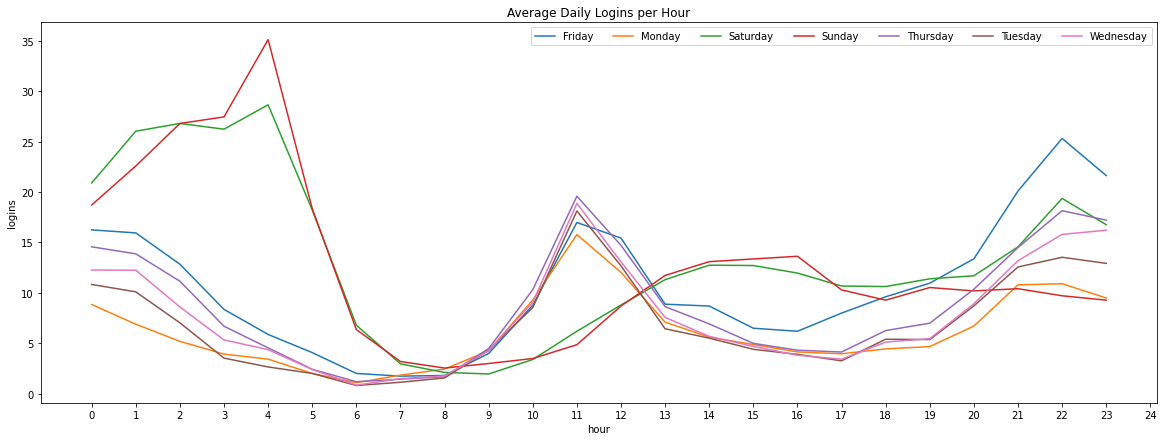

In [120]:
avg_total_logins = login_counts.groupby(['hour', 'day']).agg({'logins':'mean'})
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="hour", y="logins", data=avg_total_logins, hue="day")
ax.legend(loc="upper right", ncol=8)
ax.set(title="Average Daily Logins per Hour")
plt.xticks(range(0,25))

plt.show()

In [121]:
login_daily = df1.resample('24H', on = 'login_time').count()
login_daily.rename({'login_time':'Daily'}, axis =1, inplace=True)
login_daily.reset_index(inplace=True)
login_daily.head()

,login_time,Daily
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


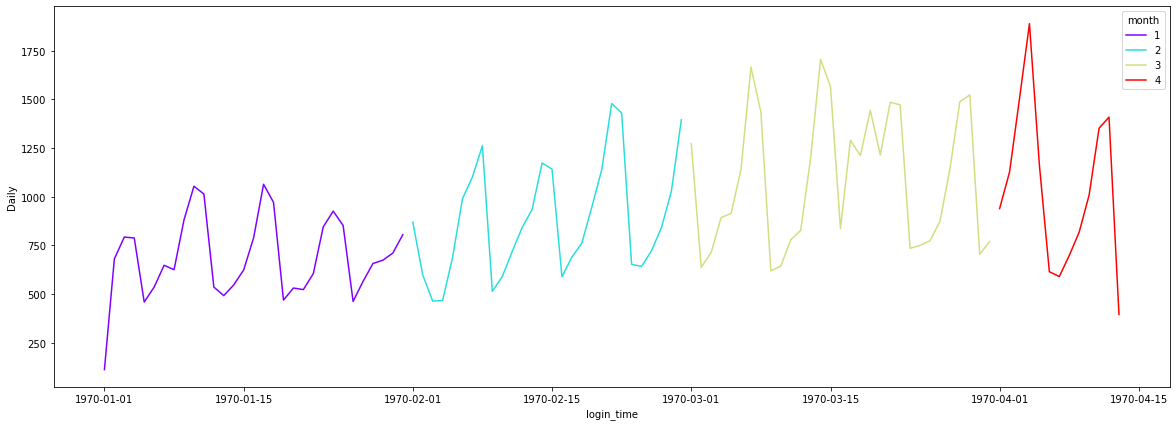

In [122]:
login_daily['month'] = login_daily['login_time'].dt.month
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="login_time", y="Daily", data=login_daily, hue="month", palette="rainbow")
plt.show()

## Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

        I would investigate if reimburse the drivers for toll money, encourage the drivers to drive both cities. The critical measure of success will be revenue increase for the Ultimate Inc. Higher revenue produced, less waiting time, and a number of trips across the bridges are indicated that the experiment is successful. 
        

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
   
   a. how you will implement the experiment
        
        I would compare two groups of drivers with and without reimbursements. Split the drivers at random by 50% and 50% for each group one for the drivers offered reimbursement and the other for remaining drivers continuing to operate without being reimbursed for tolls.
   
   b. one for the drivers offered reimbursement and the other for remaining drivers continuing to operate without being reimbursed for tolls.
   
       I perform the A/B test on those two groups. I perform the t-test with a confidence level of 95%, where the null hypothesis is the reimbursing drivers for tolls does not have a statistically significant impact on Ultimate's net profits.
       
   c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
       
       If the increased revenue is positive, then it is effective to encourage driver partners by reimbursing toll costs. If the increased revenue is negative, they should not adopt the toll cost reimbursement. Even it is revealed the increased revenue is positive, the drivers have randomly chosen, and it may not be effective in all cases.

## Part 3

In [123]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [124]:
df.shape

(50000, 12)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [126]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [127]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [128]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean()) 
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].round(1)

df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean()) 
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].round(1)

In [129]:
df['phone'] = df['phone'].fillna(df['phone'].mode().iloc[0])

In [130]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [131]:
active = lambda row: 1 if row != 0 else 0
df["active"] = df["trips_in_first_30_days"].apply(active)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


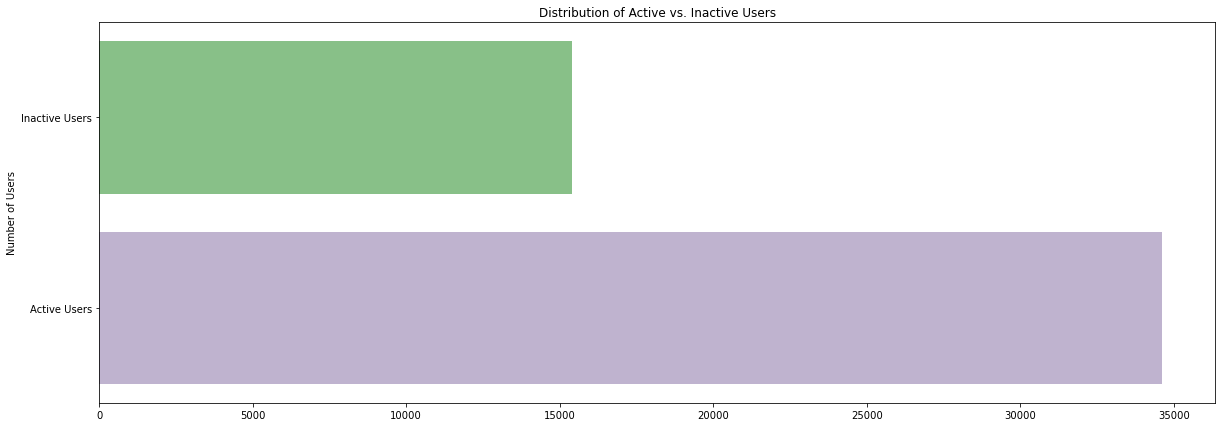

In [132]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(y=df["active"], palette="Accent")
ax.set(title="Distribution of Active vs. Inactive Users", \
       xlabel="", ylabel="Number of Users")
ax.set_yticklabels(["Inactive Users", "Active Users"])
plt.show()

In [133]:
df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])
df["signup_date"] = pd.to_datetime(df["signup_date"])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


In [134]:
df.dtypes


city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int64
dtype: object

In [135]:
# active users
active_count = len(df[df["active"] == 1])
active_pct = active_count/len(df) * 100


# inactive users

inactive_count = len(df[df["active"] == 0])
inactive_pct = inactive_count/len(df) * 100

In [139]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


In [141]:
df = df.drop(['signup_date', 'last_trip_date'], axis=1)

In [137]:
from sklearn.model_selection import train_test_split

In [142]:
X = df.drop('active', axis=1)
y = df.active

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [144]:
X_en = pd.get_dummies(X)

In [145]:
#numeric = df.drop(["city", "phone", "ultimate_black_user", "active"], axis=1)
scaler = StandardScaler()
X_en_scaled = scaler.fit_transform(X_en)
#categorical = df.drop(numeric, axis=1)

# df_encoder = pd.get_dummies(df)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_en_scaled, y, test_size=0.3, random_state=42)

In [153]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [154]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [155]:
param_grid = {'n_estimators':[100,200,300,400,500],
              'max_leaf_nodes':[10,15,20,25]}

In [156]:
model = RandomForestClassifier()

In [157]:
model_cv = GridSearchCV(model, param_grid = param_grid, cv=5)

model_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [158]:
print('Best Random Forest Score: {}'.format(model_cv.best_score_))

Best Random Forest Score: 1.0


In [159]:
from sklearn import metrics

y_pred = model_cv.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)

print(f"Model accuracy: {test_accuracy*100:.2f}%")
print(f"Model F1 Score: {test_f1_score:.2f}")
print('Mean Squared Error: ', mse(y_test, y_pred))
print('R squared: ', r_squared(y_test, y_pred))

Model accuracy: 100.00%
Model F1 Score: 1.00
Mean Squared Error:  0.0
R squared:  1.0


In [ ]:
X.head()